In [ ]:
"""
Wyjaśnialna sztuczna inteligencja

Proszę o pobranie danych ze źródła:
https://www.kaggle.com/c/titanic 
Zbiór danych dotyczy pasażerów statku rejsowego Titanic (11 cech + atrybut decyzyjny):
PassengerId - numer identyfikacyjny pasażera,
Survived - zmienna określająca, czy dany pasażer przeżył katastrofę (1) czy nie (0),
Pclass - zmienna określająca, czy pasażer podróżował w klasie 1, 2 czy 3,
Name - imię i nazwisko pasażera,
Sex - płeć pasażera,
Age - wiek pasażera,
SibSp - liczba członków rodziny znajdująca się na pokładzie statku (rodzeństwo/małżonkowie),
Parch - liczba członków rodziny znajdująca się na pokładzie statku (rodzice/dzieci),
Ticket - sygnatura biletu,
Fare - cena biletu,
Cabin - numer zajmowanej kajuty,
Embarked - zmienna określająca czy pasażer wsiadł na pokład w porcie Cherbourg, Queenstown lub Southampton.


Zbiór będzie wykorzystany w celu wyjaśnienia, z wykorzystaniem algorytmu LIME, predykcji czy dany pasażer przeżył katastrofę czy nie.


1. Przygotowanie danych.
1.1. Należy wczytać dane treningowe (titanic_train.csv).
1.2. Preprocessing danych (należy usunąć zmienne, które nie określają cech pasażera, np. PassengerId).
1.3. Podział zbioru danych na treningowy i testowy. Na podstawie uczenia zbioru treningowego, należy dokonać predykcji na temat przeżycia/śmierci pasażerów Titanica ze zbioru testowego. Zbiór testowy ma składać się z niemniej niż 200 przypadków. Zarodek liczb losowych ma być różny od 101.
"""

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [31]:
# Wczytanie danych
df = pd.read_csv('./titanic_train.csv')

In [43]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [37]:
# Usunięcie wierszy, w których brakuje 'Embarked'
df.dropna(subset=['Embarked'], inplace=True)

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
# Usunięcie zbędnych kolumn
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [39]:
# Definicja kolumn numerycznych i kategorialnych
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

In [41]:
numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = SimpleImputer(strategy='most_frequent')

In [42]:
df[numeric_features] = numeric_transformer.fit_transform(df[numeric_features])

In [20]:
# Kompozytowy transformator
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [44]:
# Model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=10000))])


In [52]:
#Definicja zmiennych niezależnych i zależnej
X = df.drop('Survived', axis=1)
y = df['Survived']

#Podział zbioru danych
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

#Sprawdzenie rozmiarów zbiorów
print("Rozmiar zbioru treningowego:", X_train.shape)
print("Rozmiar zbioru testowego:", X_test.shape)

Rozmiar zbioru treningowego: (711, 8)
Rozmiar zbioru testowego: (178, 8)


In [46]:
# Uczenie modelu
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num',
                                                                   'passthrough')]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', LogisticRegression(max_iter=10000))])

In [47]:
# Predykcja i ocena modelu
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Dokładność modelu: {accuracy * 100:.2f}%")

Dokładność modelu: 77.53%


In [ ]:
"""
2. AI - algorytm klasyfikacyjny.
2.1. Zbudowanie modelu klasyfikacyjnego z wyłączeniem regersji logistycznej (wytrenowanie modelu, wypróbowanie modelu na zbiorze testowym, ewaluacja modelu - raport z klasyfikacji i macierz błędów).
2.2. Dyskusja wyników.
"""

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
# Konwersja kategorii na wartości numeryczne
df = pd.get_dummies(df, drop_first=True)

In [53]:
# Inicjalizacja i trenowanie modelu lasów losowych
rf_model = RandomForestClassifier(random_state=102)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=102)

In [54]:
# Predykcja na zbiorze testowym
y_pred = rf_model.predict(X_test)

# Ewaluacja modelu
print("Raport z klasyfikacji:\n", classification_report(y_test, y_pred))
print("Macierz błędów:\n", confusion_matrix(y_test, y_pred))

Raport z klasyfikacji:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88       124
           1       0.70      0.78      0.74        54

    accuracy                           0.83       178
   macro avg       0.80      0.82      0.81       178
weighted avg       0.84      0.83      0.83       178

Macierz błędów:
 [[106  18]
 [ 12  42]]


In [ ]:
"""
3. XAI - LIME. 
3.1. Należy stworzyć nazwy 2 klas decyzyjnych.
3.2. Dopasowanie Explainera do danych treningowych z wykorzystaniem LimeTabularExplainer (mod -> klasyfikacja).
3.3. Należy wyświetlić klasę rzeczywistą oraz predykcję dla 5 różnych przypadków. Przy czym należy rozważyć następujące przykłady:
	3.3.1. Klasa rzeczywista: 0, Klasa przewidywana: 0;
	3.3.2. Klasa rzeczywista: 0, Klasa przewidywana: 1;
	3.3.3. Klasa rzeczywista: 1, Klasa przewidywana: 0;
	3.3.4. Klasa rzeczywista: 1, Klasa przewidywana: 1;
	3.3.5. Dowolny przypadek.
3.4. Wyjaśnienie (explain_instance() + zwrócenie prawdopodobieństwa (predict_proba()) dla poszczególnych przykładów. Jakie wielkości wpływają na predykcję w poszczególnych przypadkach?"""

In [56]:
!pip install lime

     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     ----- ------------------------------- 41.0/275.7 kB 388.9 kB/s eta 0:00:01
     --------- --------------------------- 71.7/275.7 kB 435.7 kB/s eta 0:00:01
     --------- --------------------------- 71.7/275.7 kB 435.7 kB/s eta 0:00:01
     --------- --------------------------- 71.7/275.7 kB 435.7 kB/s eta 0:00:01
     --------- --------------------------- 71.7/275.7 kB 435.7 kB/s eta 0:00:01
     -------------------------- --------- 204.8/275.7 kB 655.1 kB/s eta 0:00:01
     -------------------------- --------- 204.8/275.7 kB 655.1 kB/s eta 0:00:01
     ---------------------------------- - 266.2/275.7 kB 629.0 kB/s eta 0


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
import lime
import lime.lime_tabular
import numpy as np

# Inicjalizacja explainera
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=X_train.columns.tolist(),
                                                   class_names=['Died', 'Survived'],
                                                   discretize_continuous=True)


c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Przykład 1:
Klasa rzeczywista: 0
Klasa przewidywana: 0
Proba: [[0.73 0.27]]
[('0.00 < Sex_male <= 1.00', -0.4315335656331305), ('Age <= 22.00', 0.12635704338142234), ('1.00 < Pclass <= 3.00', -0.0958756440653306), ('Embarked_S <= 0.00', 0.06788545441827246), ('Fare <= 7.90', -0.04430801496670611)]


c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


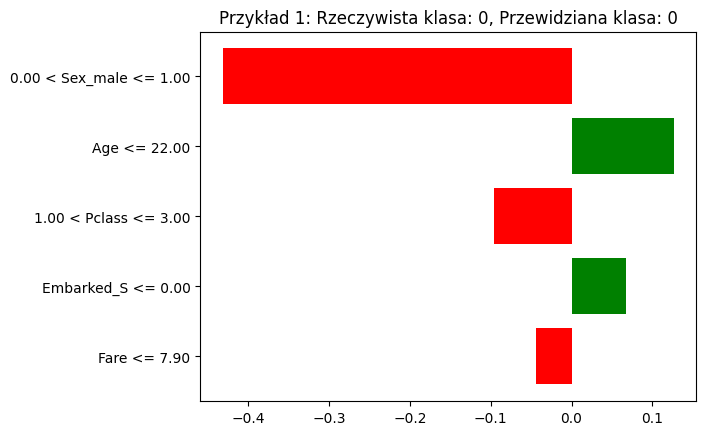

c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Przykład 2:
Klasa rzeczywista: 0
Klasa przewidywana: 1
Proba: [[0.37 0.63]]
[('0.00 < Sex_male <= 1.00', -0.4381007413596211), ('Age <= 22.00', 0.11994735497443261), ('1.00 < Pclass <= 3.00', -0.10057480407413712), ('Embarked_S <= 0.00', 0.06773887322038448), ('Fare <= 7.90', -0.058288825987298676)]


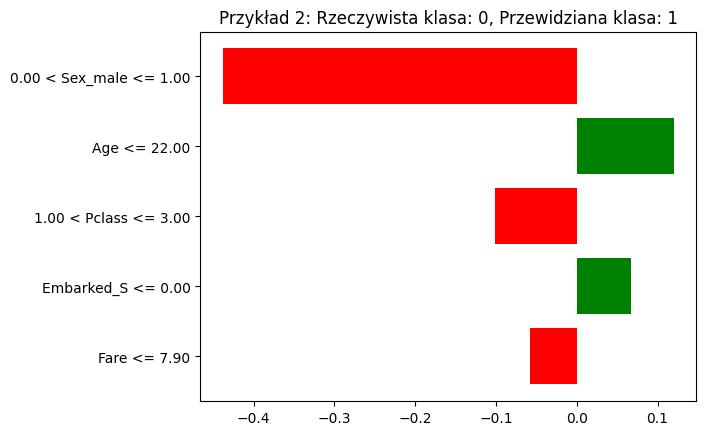

c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Przykład 3:
Klasa rzeczywista: 1
Klasa przewidywana: 0
Proba: [[0.87 0.13]]
[('0.00 < Sex_male <= 1.00', -0.44345389761310633), ('Pclass <= 1.00', 0.09645802107989997), ('Fare > 31.33', 0.09503525434600453), ('0.00 < Embarked_S <= 1.00', -0.06875341711730015), ('0.00 < SibSp <= 1.00', -0.027275110986541284)]


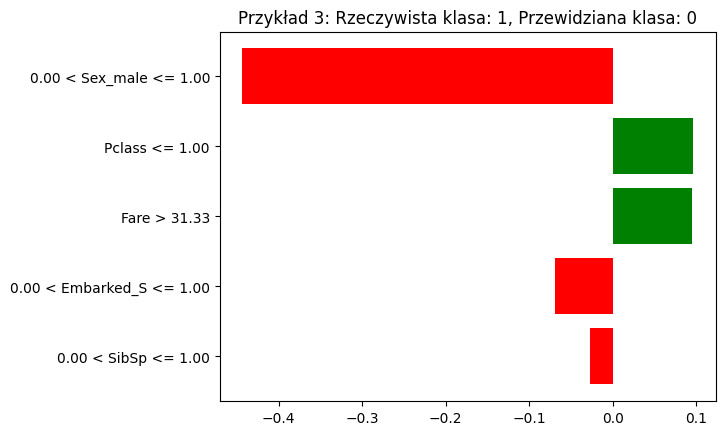

c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Przykład 4:
Klasa rzeczywista: 1
Klasa przewidywana: 1
Proba: [[0. 1.]]
[('Sex_male <= 0.00', 0.44247255487141135), ('Pclass <= 1.00', 0.10053831231878826), ('Fare > 31.33', 0.09754576662181993), ('Embarked_S <= 0.00', 0.06032152056978969), ('0.00 < SibSp <= 1.00', -0.01804158543006347)]


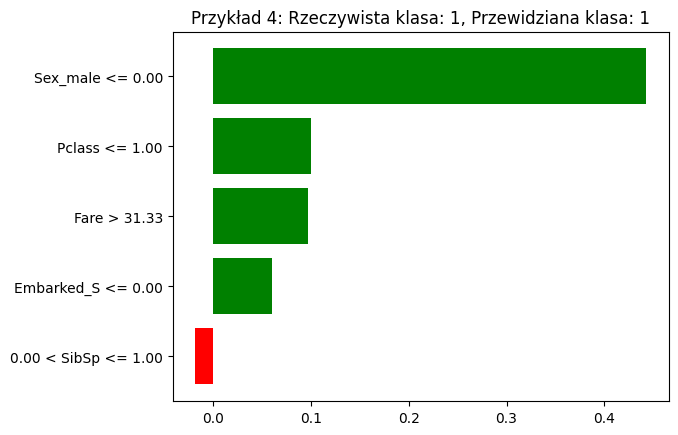

In [72]:
examples = [
    (0, 0),  # Przykład 3.3.1
    (0, 1),  # Przykład 3.3.2
    (1, 0),  # Przykład 3.3.3
    (1, 1)   # Przykład 3.3.4
]

for i, example in enumerate(examples, 1):
    true_class, predicted_class = example
    idx_to_explain = np.where((y_test == true_class) & (rf_model.predict(X_test) == predicted_class))[0][0]
    
    exp = explainer.explain_instance(X_test.values[idx_to_explain], rf_model.predict_proba, num_features=5)
    
    print(f"Przykład {i}:")
    print(f"Klasa rzeczywista: {true_class}")
    print(f"Klasa przewidywana: {predicted_class}")
    print(f"Proba: {rf_model.predict_proba(X_test.values[idx_to_explain].reshape(1, -1))}")
    print(exp.as_list())
    
    exp.as_pyplot_figure()
    plt.title(f"Przykład {i}: Rzeczywista klasa: {true_class}, Przewidziana klasa: {predicted_class}")
    plt.show()